In [ ]:
"""
Dataset: Richter's Predictor: Modeling Earthquake Damage
Source: DrivenData (2019)
Retrieved on: [07,20,2024]
URL: https://www.drivendata.org/competitions/57/nepal-earthquake
"""


# Import Data and Libraries
#!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder

trainV = pd.read_csv("/content/train_values.csv")
trainL = pd.read_csv("/content/train_labels.csv")
testV = pd.read_csv("/content/test_values.csv")

In [ ]:
trainV.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
trainL.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
trainV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

[3 2 1]
damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64


<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='Relative Frequency'>

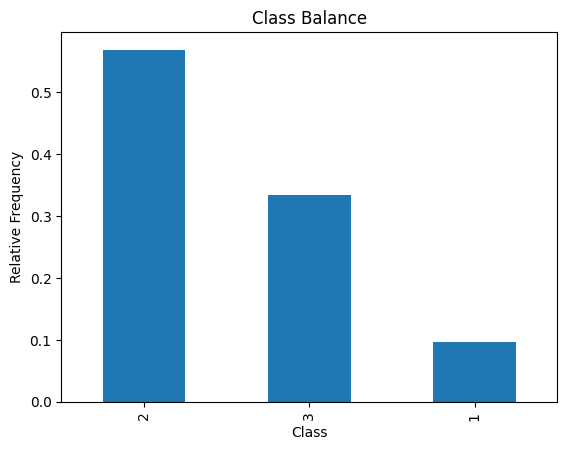

In [ ]:
# Class Distribution
print(trainL["damage_grade"].unique())
print(trainL["damage_grade"].value_counts())
trainL["damage_grade"].value_counts(normalize = True).plot(kind = "bar", xlabel = "Class", ylabel = "Relative Frequency", title = "Class Balance")

In [ ]:
columnsToDrop = list(trainV.columns)[26:]
columnsToDrop

['legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [ ]:
# Merge Data

df = trainV.merge(trainL, on = "building_id", how = "inner").drop(columns = columnsToDrop)

df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,1,1,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


Text(0.5, 1.0, 'Distribution of Building Height by Class')

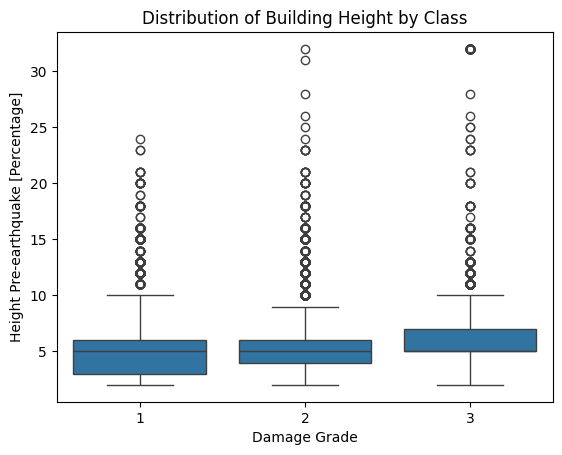

In [ ]:
sns.boxplot(x = "damage_grade", y = "height_percentage", data = df)
plt.xlabel("Damage Grade")
plt.ylabel("Height Pre-earthquake [Percentage]")
plt.title("Distribution of Building Height by Class")

In [ ]:
# To turn the problem into a logistic regression problem, we ignore damage grade 1
mask = (df["damage_grade"] >= 2)
df_filtered = df.loc[mask].copy()
df_filtered["severe_damage"] = df.loc[:,"damage_grade"] - 2
df_filtered.drop(columns = "damage_grade",inplace = True)
df_filtered.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,severe_damage
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,1
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,1
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,1,1,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Which type of foundation suffers more

foundation_pivot = pd.pivot_table(
    df_filtered, index = "foundation_type", values = "severe_damage", aggfunc = np.mean
).sort_values(by = "severe_damage")
foundation_pivot

,severe_damage
foundation_type,
i,0.048306
w,0.138876
u,0.192035
r,0.397940
h,0.468807


0.6296113845513575 0.37038861544864254


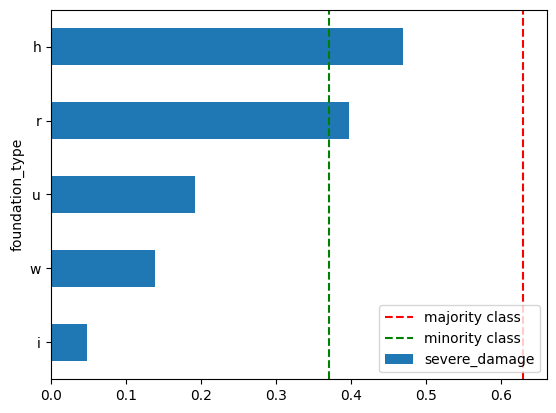

In [ ]:
majority_class_prop, minority_class_prop = df_filtered["severe_damage"].value_counts(normalize = True)
print(majority_class_prop, minority_class_prop)
foundation_pivot.plot(kind = "barh",legend = None)
plt.axvline(
    majority_class_prop, linestyle = "--", color = "red", label = "majority class"
)
plt.axvline(
    minority_class_prop, linestyle = "--", color = "green", label = "minority class"
)
plt.legend(loc = "lower right");
# Types i,w,u suffer little and h,r are more affected

In [ ]:
# Try for a logistic regression model
# Split the data for train and test
target = "severe_damage"
X = df_filtered.drop(columns = target)
y = df_filtered[target]

In [ ]:
# For randomized division use train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (188381, 26)
y_train shape: (188381,)
X_test shape: (47096, 26)
y_test shape: (47096,)


In [ ]:
# Baseline Model
baselineAcc = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", baselineAcc.round(2))

Baseline Accuracy: 0.63


In [ ]:
# Building Model

model = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LogisticRegression()
)

print(model.fit(X_train, y_train))

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression())])


In [ ]:
# Predictions

trainAcc = accuracy_score(y_train, model.predict(X_train))
testAcc = model.score(X_test, y_test)

print("Training Accuracy:", round(trainAcc, 2))
print("Test Accuracy:", round(testAcc, 2))

# No better than baseline

Training Accuracy: 0.63
Test Accuracy: 0.63


<Axes: title={'center': 'Feature Importance'}>

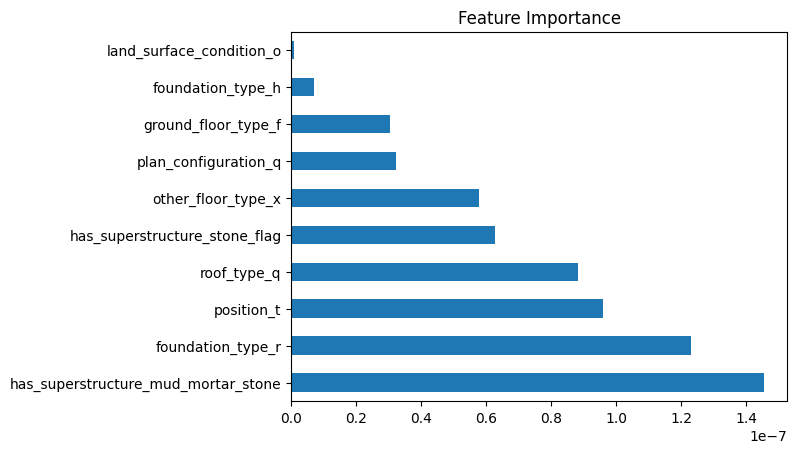

In [ ]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]
feat_imp = pd.Series(importances, index = features).sort_values(ascending = False)
feat_imp.iloc[:10].plot(kind = "barh", title = "Feature Importance")

In [ ]:
# Decision Tree Model, first validation split to determine tree depth

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 42
)

print(f"Training set length: {len(X_train)}")
print(f"Validation set length: {len(X_val)}")

Training set length: 96450
Validation set length: 24113


In [ ]:
# Baseline

b_acc = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(b_acc, 2))

Baseline Accuracy: 0.63


In [ ]:
# Model

model = make_pipeline(
    OrdinalEncoder(), # Use Ordinal rather than OneHot
    DecisionTreeClassifier(random_state = 42)
)

model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': t      1
o      2
n      3
NaN   -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O'),
                                          'mapping': u      1
r      2
w      3
i      4
h      5
Na...
NaN   -2
dtype: int64},
                                         {'col': 'other_floor_type',
                                          'data_type': dtype('O'),
                                          'mapping': q      1
x      2
j      3
s      4
NaN   -2
dtype: int64},
                                         {'col': 'position',
                                          'data_type': dtype('O'),
                                          'mapping': t      1
s      2
j      3
o      4
NaN   -2
dtype: int64},
                                         {'col': 'plan_configuration',
                                          'data_type': dtype('O'),
                                          'mapping': d       1
u       2
q       3
c       4
n       5
a       6
o       7
s       8
f       9
m      10
NaN    -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
# Predictions with random hyperparameters

tr_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)

print("Training Accuracy:", round(tr_acc, 5))
print("Validation Accuracy:", round(val_acc, 5))

# Better than baseline but there is overfitting

Training Accuracy: 1.0
Validation Accuracy: 0.70157


In [ ]:
# Hyperparameter tuning

tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

depth_params = range(1,50,2)

training_acc = list()
validation_acc = list()

for depth in depth_params:
    model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth = depth, random_state = 42)
    )
    model.fit(X_train, y_train)
    training_acc.append(model.score(X_train, y_train))
    validation_acc.append(model.score(X_val, y_val))

print(training_acc)
print(max(validation_acc))


Tree Depth: 49
[0.6291964748574391, 0.6293727319854847, 0.6985692068429238, 0.719087610160705, 0.7398444790046657, 0.7612856402280974, 0.7826438569206843, 0.8117055469155002, 0.8442509072058061, 0.8766822187662001, 0.9077656817003629, 0.936298600311042, 0.958424053913945, 0.974639709694142, 0.9850907205806118, 0.991270088128564, 0.9954173146708138, 0.9976257128045619, 0.9987350959046137, 0.9994401244167963, 0.9997407983411094, 0.9998755832037325, 0.9999585277345775, 0.9999896319336444, 1.0]
0.7481856260108655


Text(0.5, 1.0, 'Accuracy Score')

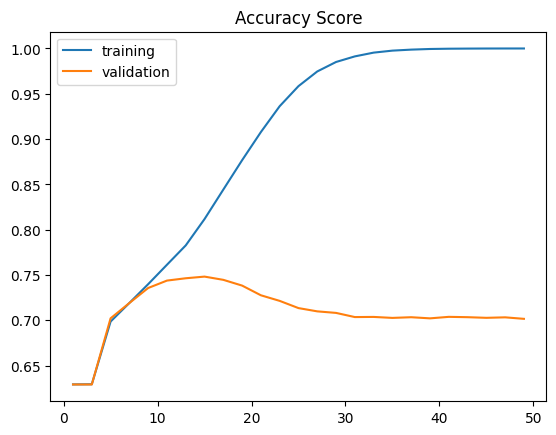

In [ ]:
plt.plot(depth_params,training_acc, label = "training")
plt.plot(depth_params,validation_acc, label = "validation")
plt.legend();
plt.title("Accuracy Score")

In [ ]:
d = depth_params[validation_acc.index(max(validation_acc))]
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth = d, random_state = 42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': t      1
o      2
n      3
NaN   -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'data_type': dtype('O'),
                                          'mapping': u      1
r      2
w      3
i      4
h      5
Na...
dtype: int64},
                                         {'col': 'other_floor_type',
                                          'data_type': dtype('O'),
                                          'mapping': q      1
x      2
j      3
s      4
NaN   -2
dtype: int64},
                                         {'col': 'position',
                                          'data_type': dtype('O'),
                                          'mapping': t      1
s      2
j      3
o      4
NaN   -2
dtype: int64},
                                         {'col': 'plan_configuration',
                                          'data_type': dtype('O'),
                                          'mapping': d       1
u       2
q       3
c       4
n       5
a       6
o       7
s       8
f       9
m      10
NaN    -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, random_state=42))])

In [ ]:
# Testing

test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.75


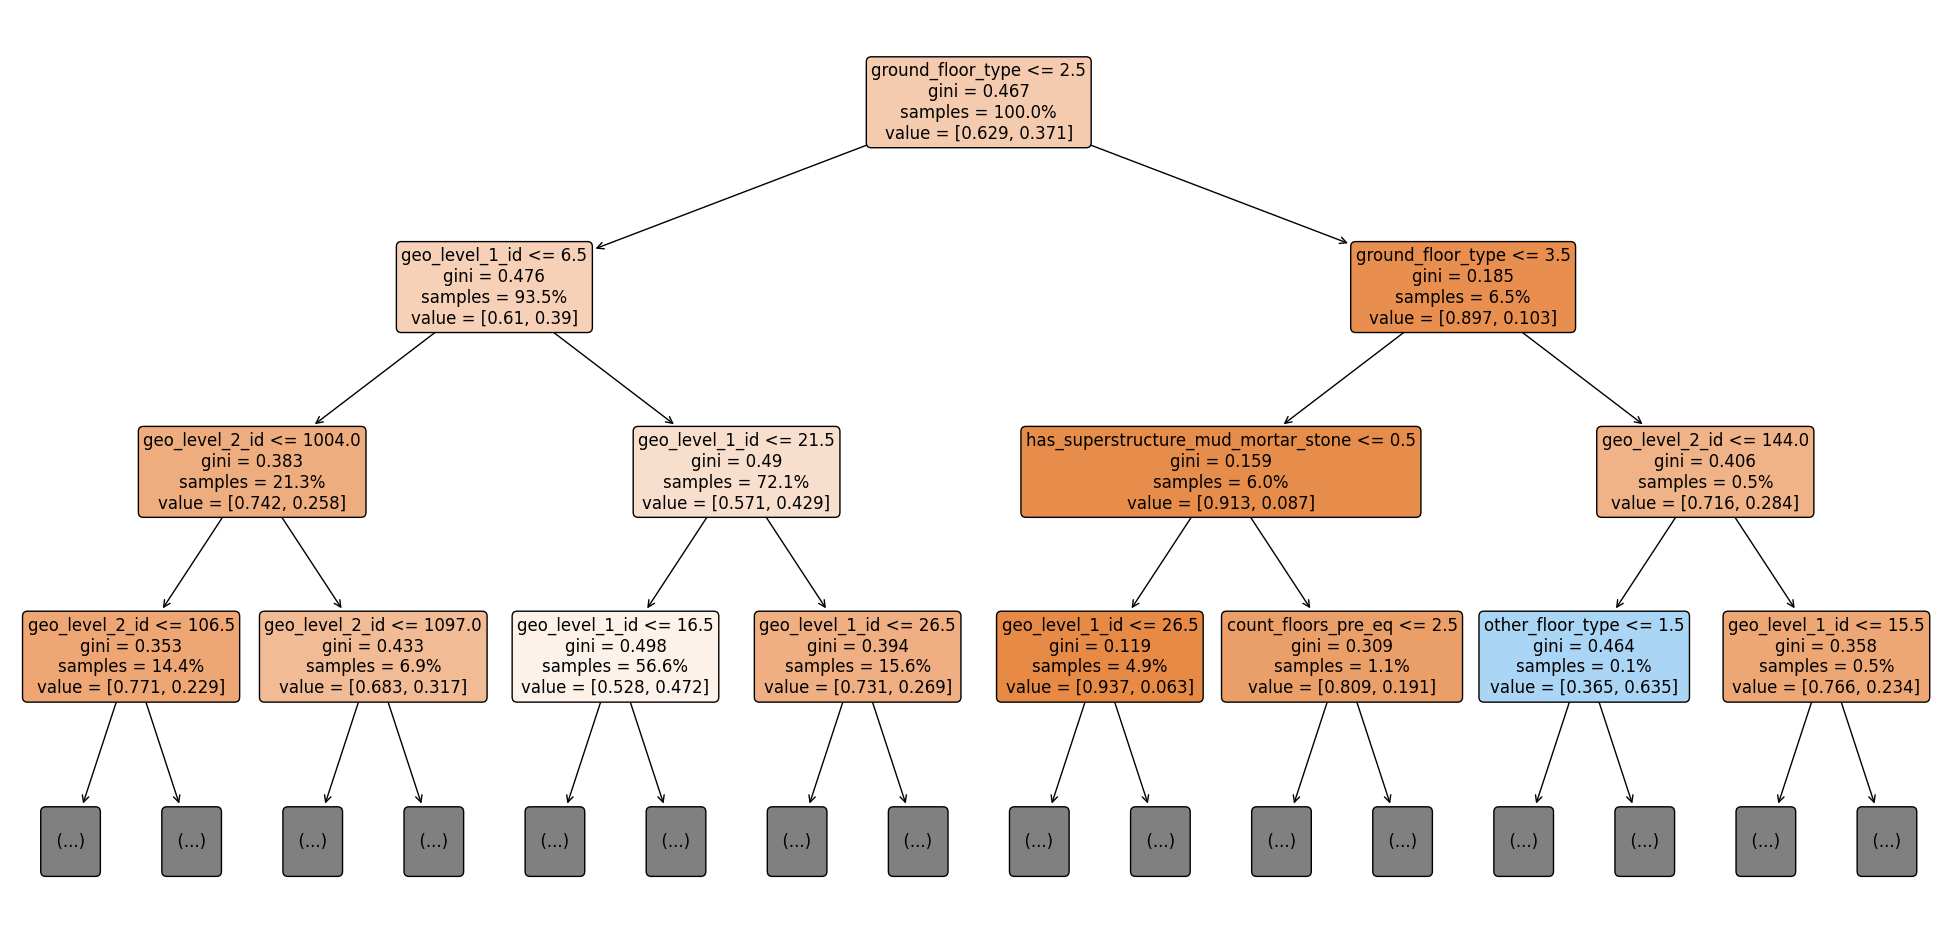

In [ ]:
# Visualise the decision logic of the model

fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree = model.named_steps["decisiontreeclassifier"],
    feature_names = X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

<Axes: title={'center': 'Feature Importance'}>

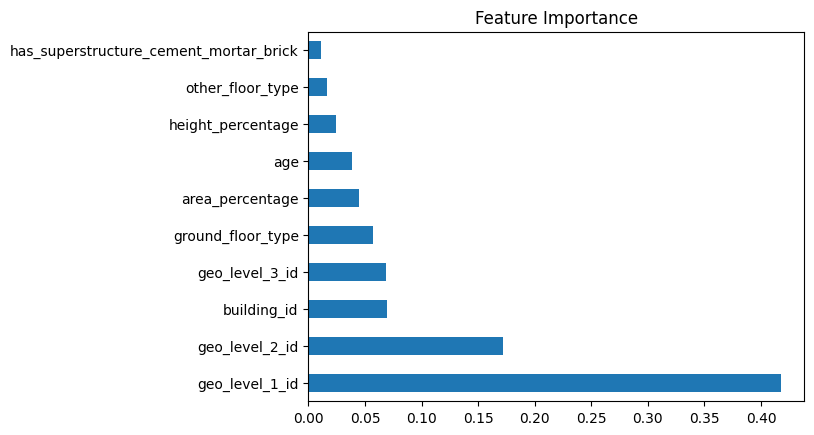

In [ ]:
# Extract features and importances


feats = X_train.columns.to_list()
imp = model.named_steps["decisiontreeclassifier"].feature_importances_

feat_imp = pd.Series(imp, index = feats).sort_values(ascending = False)
feat_imp.iloc[:10].plot(kind = "barh", title = "Feature Importance")